In [61]:
import numpy as np
import matplotlib.pyplot as plt

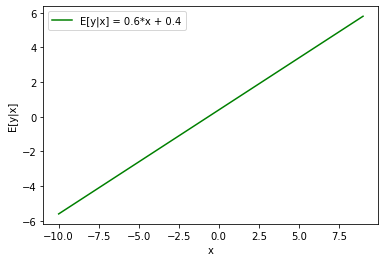

In [62]:
# (a)
x = np.arange(-10, 10, 1)
plt.plot(x, 0.6 * x + 0.4, label='E[y|x] = 0.6*x + 0.4', c='g')
plt.xlabel('x')
plt.ylabel('E[y|x]')
plt.legend()
plt.show()

In [63]:
#(b)
# Generate the requested data D.
np.random.seed(453)
N = 100
mean = [1, 1]
S = [[4, 3], [3, 5]]
X = []
Y = []
D = np.random.multivariate_normal(mean, S, N)
Y = (D[:,0]) + np.random.normal(0, 1, N) # We add noise to the Y data.
X = (D[:,1])
X = np.asarray(X)
Y = np.asarray(Y)
X = X.T
Y = Y.T

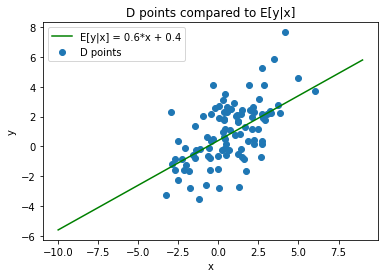

In [64]:
# Plot the data D to review them.
plt.scatter(X, Y, label='D points')
plt.plot(x, 0.6 * x + 0.4, label='E[y|x] = 0.6*x + 0.4', c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('D points compared to E[y|x]')
plt.legend()
plt.show()


In [65]:
# Approximate the theta estimate to compute our model.
theta_est = []
arr_ones = np.ones((len(X)))
X_new = np.column_stack((arr_ones,X.T))
XTXinv = np.linalg.inv(np.dot(X_new.T,X_new))
theta = np.dot(XTXinv,X_new.T).dot(Y.T)
theta_est.append(theta)
theta_est = np.array(theta_est)

In [66]:
print(f'theta0 = {theta_est[:,0]}\ntheta1 = {theta_est[:,1]}')

theta0 = [0.5159598]
theta1 = [0.64262587]


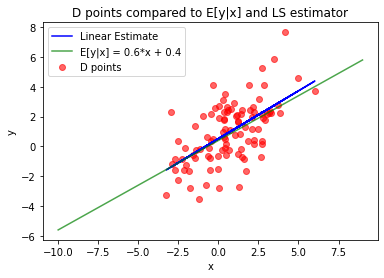

In [67]:
# Plotting the estimator.
plt.scatter(X, Y, label='D points', alpha = 0.6, c='r')
plt.plot(X.T, theta_est[:,1]*X.T + theta_est[:,0], label = 'Linear Estimate', c='b')
plt.plot(x, 0.6 * x + 0.4, label='E[y|x] = 0.6*x + 0.4', c='g', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('D points compared to E[y|x] and LS estimator')
plt.legend()
plt.show()

In [68]:
# Generate the data D'
N2 = 50
X2 = []
Y2 = []
D2 = np.random.multivariate_normal(mean, S, N2)
Y2 = (D2[:,0]) + np.random.normal(0, 1, N2)
X2 = (D2[:,1])
X2 = np.array(X2)
Y2 = np.array(Y2)

In [70]:
# Finding the estimated theta.
theta_est2 = []
arr_ones2 = np.ones((len(X2)))
X_new2 = np.column_stack((arr_ones2,X2))
XTXinv2 = np.linalg.inv(np.dot(X_new2.T,X_new2))
theta2 = np.dot(XTXinv2,X_new2.T).dot(Y2)
theta_est2.append(theta2)
theta_est2 = np.asarray(theta_est2)
theta_est2

array([[0.52953375, 0.78053927]])

In [71]:
#Finding the estimated y using the estimated thetas and the equation theta1*xi + theta0
f = []
for i in range(N2):
    y = theta_est2[0][1]*X2[i] + theta_est2[0][0]
    f.append(y)
f

[-1.2617856095456175,
 2.0176959113578175,
 1.2789337114577561,
 -1.0067218487071867,
 -1.7736422567548709,
 2.051060253651708,
 1.6209510501035962,
 1.1828691639014455,
 -0.7967297598294627,
 0.39720841012702246,
 0.685741687954438,
 2.368575994989877,
 1.354575027671058,
 -1.525207291811146,
 1.0219122267737688,
 0.662996973645585,
 -0.12321149216007099,
 1.9816782960150656,
 1.383111567947831,
 3.1839269061590723,
 1.1369710140050064,
 0.7418255978228602,
 0.9464800541626706,
 2.277349003258268,
 0.6152396499694105,
 -0.308379906406396,
 -2.0859076754119057,
 1.5757430765415885,
 2.894678219056508,
 1.01357476665365,
 -1.7965050258642576,
 4.266806656417651,
 0.7168202753912252,
 -0.4666631689325833,
 1.6939540981777428,
 0.5749965111787194,
 0.2865431969897273,
 2.2437634893039453,
 -0.07068324738906973,
 2.0047492274855108,
 1.5582315124490673,
 0.3611761997505214,
 2.45198021124001,
 0.9629447719413151,
 1.152071696886102,
 -0.4862397270826384,
 2.865696411217333,
 0.810169674186

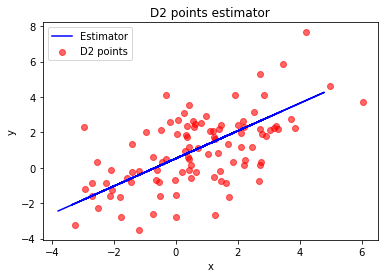

In [72]:
# Plotting the estimator.
plt.scatter(X, Y, label='D2 points', alpha = 0.6, c='r')
plt.plot(X2, f, label ='Estimator', c='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('D2 points estimator')
plt.legend()
plt.show()

In [73]:
# Finding the optimum y estimated by the equation 0.6*xi + 0.4
yi = []
for i in range(N2):
    y = 0.6*X2[i] + 0.4
    yi.append(y)
yi

[-0.9769859544186327,
 1.543949223635618,
 0.9760632312694338,
 -0.7809186177844923,
 -1.3704498052883403,
 1.569596370492583,
 1.2389717230542179,
 0.9022184799711082,
 -0.619497844229069,
 0.2982816016620806,
 0.5200769328685986,
 1.8136705013646055,
 1.0342086587527108,
 -1.1794780194760572,
 0.7784909936685638,
 0.5025930867025173,
 -0.1017648174662924,
 1.5162625076201683,
 1.0561446775365158,
 2.440430183138563,
 0.8669366038745274,
 0.563188595614355,
 0.7205063347277224,
 1.7435443758845866,
 0.46588206500667767,
 -0.2441036494928528,
 -1.6104880167448572,
 1.2042203850288047,
 2.2180849173167916,
 0.7720819938378097,
 -1.388024400097982,
 3.2728390985812164,
 0.5439670215470213,
 -0.3657758839775096,
 1.2950891156427278,
 0.43494719203784776,
 0.21321332882490815,
 1.7177272145251412,
 -0.061386392022937,
 1.5339971166928557,
 1.1907592578164068,
 0.2705836664542769,
 1.8777832647397998,
 0.7331627519023147,
 0.878544488366314,
 -0.3808243706944292,
 2.195806621665576,
 0.6157

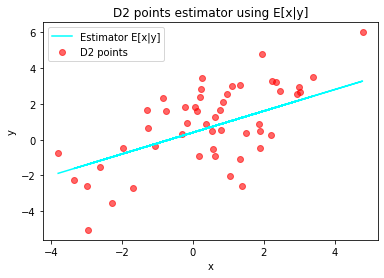

In [74]:
# Plotting the optimum estimator
plt.scatter(X2, Y2, label='D2 points', alpha = 0.6, c='r')
plt.plot(X2, yi, label ='Estimator E[x|y]', c='cyan')
plt.xlabel('x')
plt.ylabel('y')
plt.title('D2 points estimator using E[x|y]')
plt.legend()
plt.show()

(e) A practical way of quantifying the performance of the two estimators f(xn;D) and E[y|x] is by the use of the MSE. We will compute the MSE of these two estimators. The MSE to compute is:
MSE = ΕD[(f(xn;D) - E[y|x]^2] for both estimators. We can also compute the MSE for both estimators in order to check them both and compare them.

In [75]:
# Comparing the MSEs.
MSE = np.mean(pow(np.array(f)-np.array(yi),2))
MSEf = np.mean(pow(np.array(f)-np.array(Y2),2))
MSEyi = np.mean(pow(np.array(Y2)-np.array(yi),2))
print(f'The MSE of our case is: {MSE}\nThe MSE of the f(xn;D) estimator is: {MSEf}\nThe MSE of the E[y|x] estimator is: {MSEyi}\nThe difference of the two estimators is: {MSEyi-MSEf}')

The MSE of our case is: 0.1538689409397925
The MSE of the f(xn;D) estimator is: 2.7695249633030437
The MSE of the E[y|x] estimator is: 2.9233939042428365
The difference of the two estimators is: 0.15386894093979286
